[1, 1000] loss: 2.081
[1, 2000] loss: 1.829
[1, 3000] loss: 1.678
[1, 4000] loss: 1.629
[1, 5000] loss: 1.566
[1, 6000] loss: 1.539
[1, 7000] loss: 1.513
[1, 8000] loss: 1.468
[1, 9000] loss: 1.444
[1, 10000] loss: 1.438
[1, 11000] loss: 1.401
[1, 12000] loss: 1.383
[2, 1000] loss: 1.366
[2, 2000] loss: 1.318
[2, 3000] loss: 1.322
[2, 4000] loss: 1.341
[2, 5000] loss: 1.293
[2, 6000] loss: 1.309
[2, 7000] loss: 1.327
[2, 8000] loss: 1.290
[2, 9000] loss: 1.289
[2, 10000] loss: 1.269
[2, 11000] loss: 1.279
[2, 12000] loss: 1.274
[3, 1000] loss: 1.238
[3, 2000] loss: 1.197
[3, 3000] loss: 1.204
[3, 4000] loss: 1.226
[3, 5000] loss: 1.253
[3, 6000] loss: 1.221
[3, 7000] loss: 1.237
[3, 8000] loss: 1.194
[3, 9000] loss: 1.188
[3, 10000] loss: 1.187
[3, 11000] loss: 1.228
[3, 12000] loss: 1.238
[4, 1000] loss: 1.168
[4, 2000] loss: 1.200
[4, 3000] loss: 1.170
[4, 4000] loss: 1.187
[4, 5000] loss: 1.170
[4, 6000] loss: 1.170
[4, 7000] loss: 1.195
[4, 8000] loss: 1.144
[4, 9000] loss: 1.160
[

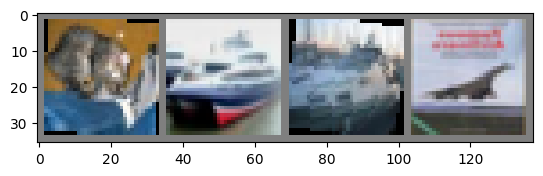

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# Data transforms with Data Augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Random Horizontal Flip for Augmentation
    transforms.RandomRotation(10),      # Random Rotation for Augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

# Define the neural network model (Improved Simple CNN)
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Increased filters and smaller kernel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)  # CIFAR-10 has 10 classes
        self.dropout = nn.Dropout(0.5)  # Added Dropout to prevent overfitting
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 128 * 4 * 4)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after the first fully connected layer
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize and train the model (This part should be done before visualization)
model = ImprovedCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam Optimizer

# Train the model (Increased epochs for better learning)
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 1000 == 999:  # Print every 1000 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 1000:.3f}")
            running_loss = 0.0

# Visualizing predictions
def visualize_predictions():
    dataiter = iter(testloader)
    images, labels = next(dataiter)

    # Get predictions
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Classes of CIFAR-10
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    # Print labels and predictions
    print("True labels:", ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
    print("Predicted labels:", ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

    # Visualize images
    imshow(torchvision.utils.make_grid(images))
    plt.show()

# Utility function to display image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert from Tensor image
    plt.show()

# Call the function to visualize predictions
visualize_predictions()
